In [194]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/data.csv")

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
dataset.head()

brand  color size  price  offer_price
0  Tresmode  Black  6.5   4647         4153
1     Lavie   Gold    4   2446         1172
2      FILA    Red    6   2346         1898
3     Crocs    Red    5   5942         5868
4     Crocs   Blue    4   2942         2118

In [197]:
dataset

brand        color size  price  offer_price
0     Tresmode        Black  6.5   4647         4153
1        Lavie         Gold    4   2446         1172
2         FILA          Red    6   2346         1898
3        Crocs          Red    5   5942         5868
4        Crocs         Blue    4   2942         2118
...        ...          ...  ...    ...          ...
5674      Toms  Red & White    4   6747         5098
5675     Crocs        Black    7   2942         2868
5676      Toms         Blue    9   4847         3673
5677   Liberty        Black    6   2146         1722
5678     Crocs        Brown    2   3442         3368

[5679 rows x 5 columns]

In [198]:
dataset.shape

(5679, 5)

In [199]:
dataset.dtypes

brand          object
color          object
size           object
price           int64
offer_price     int64
dtype: object

In [200]:
dataset.describe()

price   offer_price
count   5679.000000   5679.000000
mean    4945.126255   4007.745026
std     5344.881308   4761.543884
min     1346.000000    773.000000
25%     2942.000000   1968.000000
50%     3742.000000   2868.000000
75%     4646.000000   4048.000000
max    37947.000000  34123.000000

In [201]:
dataset.duplicated().sum()

1042

In [202]:
dataset.duplicated().sum()

1042

In [203]:
dataset.isnull()

brand  color   size  price  offer_price
0     False  False  False  False        False
1     False  False  False  False        False
2     False  False  False  False        False
3     False  False  False  False        False
4     False  False  False  False        False
...     ...    ...    ...    ...          ...
5674  False  False  False  False        False
5675  False  False  False  False        False
5676  False  False  False  False        False
5677  False  False  False  False        False
5678  False  False  False  False        False

[5679 rows x 5 columns]

In [204]:
dataset.isnull().sum()

brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

In [205]:
dataset.drop_duplicates(inplace=True)

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

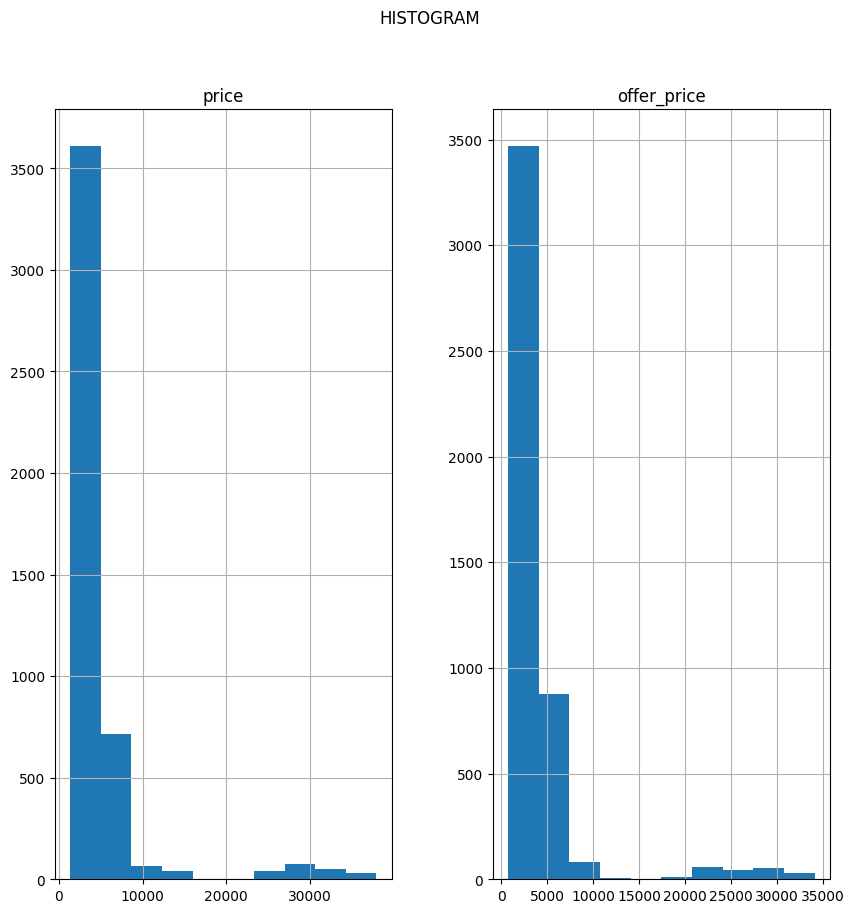

In [207]:
dataset.hist(figsize=(10,10))
plt.suptitle('HISTOGRAM')
plt.show()

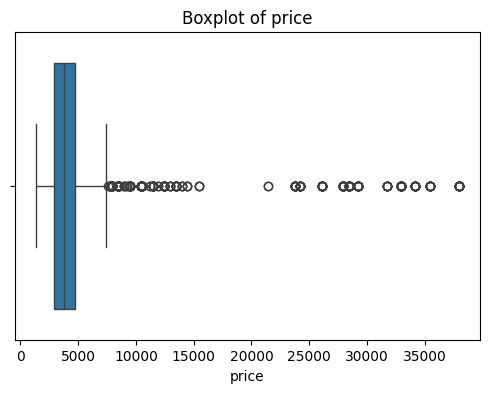

In [208]:
for col in dataset.select_dtypes(include=['float64','int64']).columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [209]:
sns.kdeplot(data=dataset,x="price",fill=True)
plt.xlabel("price")
plt.ylabel("density")
plt.show()

# It helps you see the overall shape of the data distribution,

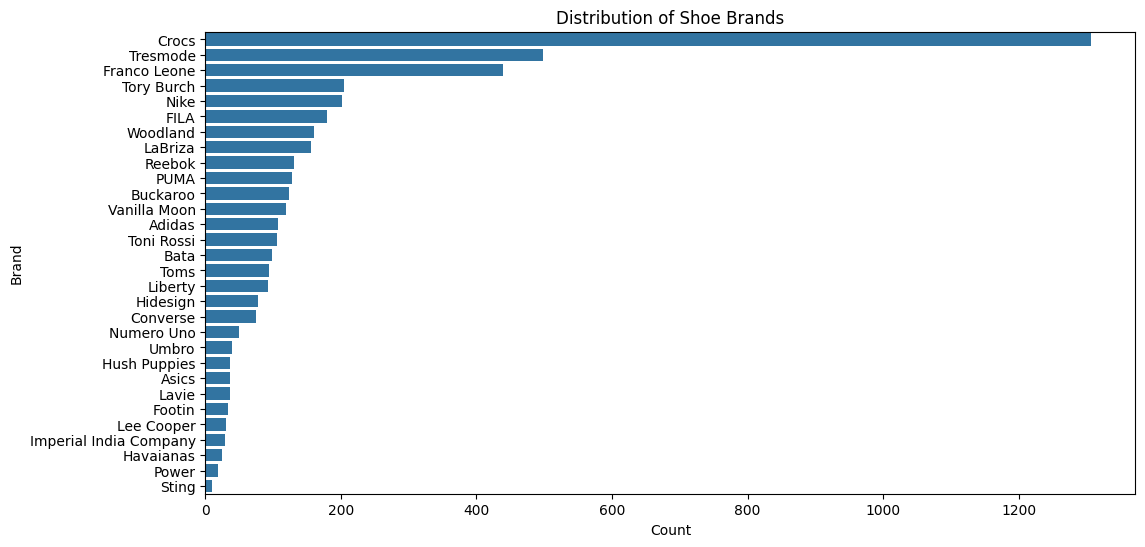

In [210]:
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=dataset, order=dataset['brand'].value_counts().index)
plt.title('Distribution of Shoe Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

In [211]:
plt.figure(figsize=(12, 6))
sns.countplot(y='size', data=dataset, order=dataset['size'].value_counts().index)
plt.title('Distribution of Shoe Sizes')
plt.xlabel('Count')
plt.ylabel('Size')
plt.show()

In [212]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['price'], bins=30, kde=True, color='blue', label='Price')
sns.histplot(dataset['offer_price'], bins=30, kde=True, color='orange', label='Offer Price')
plt.title('Price and Offer Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

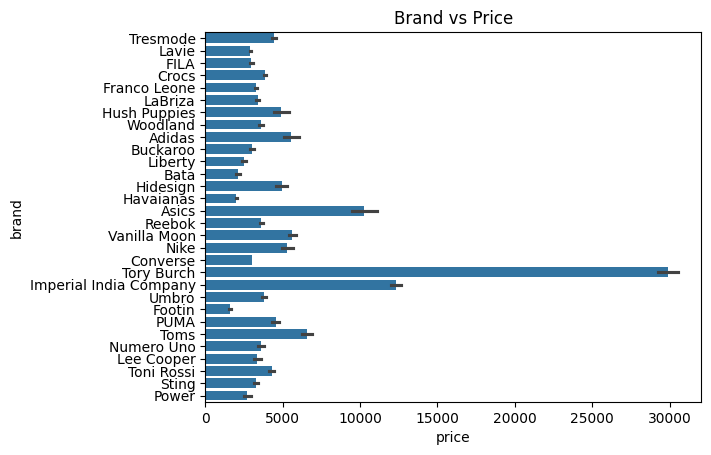

In [213]:
sns.barplot(data=dataset,x="price",y="brand")
plt.title("Brand vs Price")
plt.xlabel("price")
plt.show()

In [214]:
sns.violinplot(data=dataset,x="brand",y="price",palette="rainbow")
plt.xticks(rotation=90)
plt.title("Brand vs Price")
plt.xlabel("brand")
plt.show()

<ipython-input-214-b945fed9bdd8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dataset,x="brand",y="price",palette="rainbow")


# **PREPROCESSING**

**LABEL ENCODING**

In [215]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['brand']=label_encoder.fit_transform(dataset['brand'])

In [216]:

dataset['color']=label_encoder.fit_transform(dataset['color'])

In [217]:
dataset

brand  color size  price  offer_price
0        26      4  6.5   4647         4153
1        14     45    4   2446         1172
2         6     89    6   2346         1898
3         5     89    5   5942         5868
4         5     22    4   2942         2118
...     ...    ...  ...    ...          ...
5670      8      4    8   2142         1053
5672     25     76  5.5  35447        31873
5673      6     52   11   3046         2172
5674     23     91    4   6747         5098
5676     23     22    9   4847         3673

[4637 rows x 5 columns]

In [218]:
dataset['size']=pd.to_numeric(dataset['size'],errors='coerce')

In [219]:
dataset.dtypes

brand            int64
color            int64
size           float64
price            int64
offer_price      int64
dtype: object

In [220]:
dataset['brand']

0       26
1       14
2        6
3        5
4        5
        ..
5670     8
5672    25
5673     6
5674    23
5676    23
Name: brand, Length: 4637, dtype: int64

In [221]:
print(data)

     size     price  offer_price  color_Aqua Green  color_Arabesco White  \
0     6.5 -0.089093    -0.001681               0.0                   0.0   
1       4 -0.475119    -0.589152               0.0                   0.0   
2       6 -0.492658    -0.446078               0.0                   0.0   
3       5  0.138033     0.336297               0.0                   0.0   
4       4 -0.388128    -0.402722               0.0                   0.0   
...   ...       ...          ...               ...                   ...   
5370  NaN       NaN          NaN               NaN                   NaN   
5371  NaN       NaN          NaN               NaN                   NaN   
5372  NaN       NaN          NaN               NaN                   NaN   
5373  NaN       NaN          NaN               NaN                   NaN   
5375  NaN       NaN          NaN               NaN                   NaN   

      color_Ash  color_Beige  color_Black  color_Black   color_Black & Blue  \
0       

In [222]:
# 1. Create a OneHotEncoder instance
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # handle_unknown='ignore' for unseen values during prediction

# 2. Fit and transform the 'color' column
#encoded_data = encoder.fit_transform(dataset[['color']])
#
# 3. Create a DataFrame from the encoded data
#encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))

# 4. Concatenate the encoded DataFrame with the original dataset
#dataset = pd.concat([dataset, encoded_df], axis=1)

# 5. (Optional) Drop the original 'color' column
#dataset = dataset.drop('color', axis=1)

In [223]:
dataset

brand  color  size  price  offer_price
0        26      4   6.5   4647         4153
1        14     45   4.0   2446         1172
2         6     89   6.0   2346         1898
3         5     89   5.0   5942         5868
4         5     22   4.0   2942         2118
...     ...    ...   ...    ...          ...
5670      8      4   8.0   2142         1053
5672     25     76   5.5  35447        31873
5673      6     52  11.0   3046         2172
5674     23     91   4.0   6747         5098
5676     23     22   9.0   4847         3673

[4637 rows x 5 columns]

In [224]:
x=dataset.drop('offer_price',axis=1)
y=dataset['offer_price']

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [226]:
x_train

brand  color  size  price
4813     16     27   9.0   3946
5234      0     64   7.0   3746
920       5     27   5.0   6442
1619     16     27   8.0   3746
5291      5    106   6.0   3742
...     ...    ...   ...    ...
5386     25     98   5.5  28447
472      15     27   8.0   3446
3538     19      4   3.0   5446
4473     25      4   4.0  12947
896       2      4   6.0   1346

[3709 rows x 4 columns]

In [227]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [228]:
print(data)

     size     price  offer_price  color_Aqua Green  color_Arabesco White  \
0     6.5 -0.089093    -0.001681               0.0                   0.0   
1       4 -0.475119    -0.589152               0.0                   0.0   
2       6 -0.492658    -0.446078               0.0                   0.0   
3       5  0.138033     0.336297               0.0                   0.0   
4       4 -0.388128    -0.402722               0.0                   0.0   
...   ...       ...          ...               ...                   ...   
5370  NaN       NaN          NaN               NaN                   NaN   
5371  NaN       NaN          NaN               NaN                   NaN   
5372  NaN       NaN          NaN               NaN                   NaN   
5373  NaN       NaN          NaN               NaN                   NaN   
5375  NaN       NaN          NaN               NaN                   NaN   

      color_Ash  color_Beige  color_Black  color_Black   color_Black & Blue  \
0       

In [229]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#data['price']=scaler.fit_transform(data[['price']])
#data['offer_price']=scaler.fit_transform(data[['offer_price']])

In [230]:
#print(data)

# **Visualization**

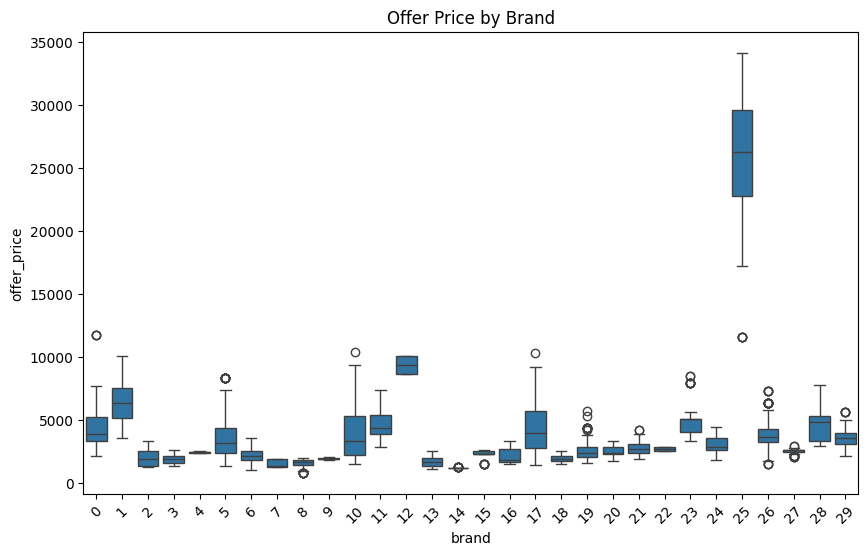

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of target variable
sns.histplot(dataset['offer_price'], kde=True, color='blue')
plt.title('Distribution of Offer Price')
plt.show()

# Boxplot of Offer Price by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='offer_price', data=dataset)
plt.xticks(rotation=45)
plt.title('Offer Price by Brand')
plt.show()


# **Preprocessing**

In [232]:
##from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#dataset['brand'] = label_encoder.fit_transform(dataset['brand'])

In [233]:
dataset.dtypes

brand            int64
color            int64
size           float64
price            int64
offer_price      int64
dtype: object

In [234]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data['price'] = scaler.fit_transform(data[['price']])
#data['offer_price'] = scaler.fit_transform(data[['offer_price']])

In [235]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#data['price'] = scaler.fit_transform(data[['price']])
#data['offer_price'] = scaler.fit_transform(data[['offer_price']])

In [236]:
dataset

brand  color  size  price  offer_price
0        26      4   6.5   4647         4153
1        14     45   4.0   2446         1172
2         6     89   6.0   2346         1898
3         5     89   5.0   5942         5868
4         5     22   4.0   2942         2118
...     ...    ...   ...    ...          ...
5670      8      4   8.0   2142         1053
5672     25     76   5.5  35447        31873
5673      6     52  11.0   3046         2172
5674     23     91   4.0   6747         5098
5676     23     22   9.0   4847         3673

[4637 rows x 5 columns]

In [237]:
x

brand  color  size  price
0        26      4   6.5   4647
1        14     45   4.0   2446
2         6     89   6.0   2346
3         5     89   5.0   5942
4         5     22   4.0   2942
...     ...    ...   ...    ...
5670      8      4   8.0   2142
5672     25     76   5.5  35447
5673      6     52  11.0   3046
5674     23     91   4.0   6747
5676     23     22   9.0   4847

[4637 rows x 4 columns]

In [238]:
##from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming 'offer_price' is the target variable


# Create a LabelEncoder instance
#label_encoder = LabelEncoder()

# Fit and transform the 'size' column in X
#X['size'] = label_encoder.fit_transform(X['size'])

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 150818.74854698282
R-squared: 0.9929463420271681


In [239]:
!pip install joblib

In [240]:
import joblib

In [241]:
joblib.dump(rf,'/content/model.pkl')
joblib.dump(label_encoder,'/content/label_encoder.pkl')
joblib.dump(scaler,'/content/scaler.pkl')
#joblib.dump(one_hot_encoded,'/content/one_hot_encoded.pkl')

['/content/scaler.pkl']